In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import agate

In [4]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [111]:
original_data=pd.read_csv("Analytics_Author_Cleaned.csv")
original_data.head()

,dcrType,article_id,byline,seo_url,sectionPath,storyKeywords,blogType,webHeadline,publishDate,pageView,cleaned_byline
0,BlogArticle,2259722,Joey Knight,florida-winless-in-bowls-for-first-time-since-...,NaN,"latest sports, Citrus, Florida, Michigan, USF",bulls,Florida winless in bowls for first time since ...,2016-01-01T23:34:49+00:00,69,JOEY KNIGHT
1,BlogArticle,2259937,Joey Knight,sun-dome-to-host-rare-top-25-matchup-sunday,NaN,"USF, UConn, women's, Associated Press, Sun Dome",bulls,Sun Dome to host rare top-25 matchup Sunday,2016-01-04T19:41:45+00:00,41,JOEY KNIGHT
2,BlogArticle,2259956,Joey Knight,thirty-days-out-bulls-2016-class-taking-solid-...,NaN,"USF, Willie Taggart, Shavar Manuel, Romeo Finl...",bulls,"Thirty days out, Bulls' 2016 class taking soli...",2016-01-04T21:38:41+00:00,367,JOEY KNIGHT
3,BlogArticle,2260089,Joey Knight,bulls-brace-for-ucfs-fall-guy,NaN,"USF, Tacko Fall, Orlando Antigua, Jahmal McMurray",bulls,Bulls brace for UCF's Fall guy,2016-01-05T22:25:59+00:00,113,JOEY KNIGHT
4,BlogArticle,2260437,Joey Knight,nba-wnba-executives-set-for-usf-lecture-series,NaN,"USF, lecture series, Scott O'Neil, Donna Orender",bulls,"NBA, WNBA executives set for USF lecture series",2016-01-07T19:58:06+00:00,183,JOEY KNIGHT


In [6]:
# OVERVIEW OF PAGEVIEWS FOR ALL ARTICLES

In [112]:
original_sorted_by_pageView = original_data.sort_values(by=('pageView'), ascending=False)
times_produced_only = original_sorted_by_pageView[original_sorted_by_pageView['cleaned_byline'] != None]
times_produced_only.index=times_produced_only.index.astype(str)
times_produced_only.head()

,dcrType,article_id,byline,seo_url,sectionPath,storyKeywords,blogType,webHeadline,publishDate,pageView,cleaned_byline
3534,BlogArticle,2275308,Alex Leary,marco-rubio-warming-up-to-donald-trump,NaN,NaN,the-buzz-florida-politics,Marco Rubio warming up to Donald Trump,2016-04-29T20:00:00+00:00,656728,ALEX LEARY
4426,BlogArticle,2298412,Adam C. Smith,trump-fans-boo-walk-out-on-amy-schumer-in-tampa,NaN,"tampa, breaking-news",the-buzz-florida-politics,"Trump fans boo, walk out on Amy Schumer show i...",2016-10-17T14:48:00+00:00,541654,ADAM C. SMITH
15194,StaffArticle,2261154,"By Tony Marrero, Times Staff Writer",tampa-buddies-form-mother-of-all-powerball-poo...,news/nation,"breaking-news,top-news,news-nav,app-news,",NaN,Tampa buddies form mother of all Powerball poo...,2016-01-14T05:39:44+00:00,428782,TONY MARRERO
35792,StaffArticle,2295668,"By Mark Puente, Times Staff Writer",democrats-object-to-chick-fil-a-voter-registra...,news/politics,"neigh south,clearwater, top-news, news-nav,",NaN,Democrats object to Chick-fil-A voter registra...,2016-09-29T13:10:13+00:00,305156,MARK PUENTE
55089,BlogArticle,2325887,Craig Pittman,hurricane-season-starts-with-nobody-in-charge-...,NaN,"FEMA, NOAA, Trump, hurricanes",the-buzz-florida-politics,Hurricane season starts with nobody in charge ...,2017-06-01T19:21:01+00:00,293564,CRAIG PITTMAN


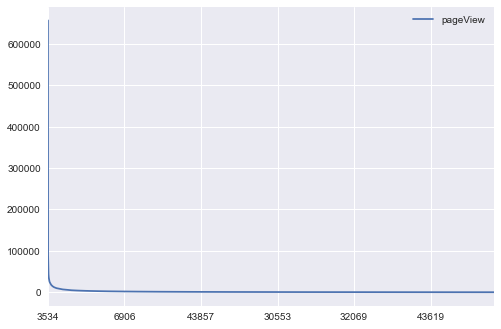

In [113]:
times_produced_only.plot.line(x=None, y=("pageView"))


In [41]:
# Exploring who gets how many hits 

In [42]:
# original_author_list = times_produced_only['cleaned_byline']
# original_author_list.head()

In [43]:
# author_data=[]
# for index, byline_data in original_author_list.iteritems(): 
#     if type(byline_data) != str:
#         continue
#     elif byline_data=="":
#         continue
#     elif "," in byline_data : 
#         byline_array=byline_data.split(',')
#         for byline in byline_array: 
#             author_data.append(byline.strip())
#     else : 
#         author_data.append(byline_data.strip())

# author_data_set=set(author_data)
# print(author_data_set)



In [44]:
# def get_author_hits(author_name): 
#     hits=0
#     for index, byline_data in times_produced_only['cleaned_byline'].iteritems():
#         print(byline_data)
#         if (type(byline_data) == str) and (author_name in byline_data): 
#             print(times_produced_only['pageView'],times_produced_only['seo_url'] )
#             print(times_produced_only[index])

# get_author_hits("ADAM C. SMITH")


In [47]:
# EXPLORING CORRELATION BETWEEN PUBLISH DAY AND HITS

In [114]:
from datetime import datetime
from pytz import timezone
import pytz
import dateutil.parser


# function to convert string data to python Datetime Object
def getDateTimeFromISO8601String(s):
    d = dateutil.parser.parse(s)
    return d

# function to convert to Eastern time with Daylight Saving awareness
def to_eastern_time(d): 
    # get local timezone and datetime object
    localtz=timezone('US/Eastern')     
    time_obj= getDateTimeFromISO8601String(d)
    # start converting     
    local_time=time_obj.astimezone(localtz)
    return local_time


In [153]:
# generate array of converted date data, ready to be applied to column
date_data_array=[]
hour_data_array=[]
day_data_array=[]
for index, date in original_data['publishDate'].iteritems():
    formatted_date= to_eastern_time(date)
    day=formatted_date.weekday()
    date_data_array.append(formatted_date)
    hour_data_array.append(formatted_date.time().hour)
    day_data_array.append(day)
    

In [157]:
# apply values to new columns  
original_data.loc[:,"local_time"]= date_data_array
original_data.loc[:,"publish_hour"]= hour_data_array
original_data.loc[:,"publish_day"]= day_data_array
original_data.head()

,dcrType,article_id,byline,seo_url,sectionPath,storyKeywords,blogType,webHeadline,publishDate,pageView,cleaned_byline,local_time,publish_hour,publish_day
0,BlogArticle,2259722,Joey Knight,florida-winless-in-bowls-for-first-time-since-...,NaN,"latest sports, Citrus, Florida, Michigan, USF",bulls,Florida winless in bowls for first time since ...,2016-01-01T23:34:49+00:00,69,JOEY KNIGHT,2016-01-01 18:34:49-05:00,18,4
1,BlogArticle,2259937,Joey Knight,sun-dome-to-host-rare-top-25-matchup-sunday,NaN,"USF, UConn, women's, Associated Press, Sun Dome",bulls,Sun Dome to host rare top-25 matchup Sunday,2016-01-04T19:41:45+00:00,41,JOEY KNIGHT,2016-01-04 14:41:45-05:00,14,0
2,BlogArticle,2259956,Joey Knight,thirty-days-out-bulls-2016-class-taking-solid-...,NaN,"USF, Willie Taggart, Shavar Manuel, Romeo Finl...",bulls,"Thirty days out, Bulls' 2016 class taking soli...",2016-01-04T21:38:41+00:00,367,JOEY KNIGHT,2016-01-04 16:38:41-05:00,16,0
3,BlogArticle,2260089,Joey Knight,bulls-brace-for-ucfs-fall-guy,NaN,"USF, Tacko Fall, Orlando Antigua, Jahmal McMurray",bulls,Bulls brace for UCF's Fall guy,2016-01-05T22:25:59+00:00,113,JOEY KNIGHT,2016-01-05 17:25:59-05:00,17,1
4,BlogArticle,2260437,Joey Knight,nba-wnba-executives-set-for-usf-lecture-series,NaN,"USF, lecture series, Scott O'Neil, Donna Orender",bulls,"NBA, WNBA executives set for USF lecture series",2016-01-07T19:58:06+00:00,183,JOEY KNIGHT,2016-01-07 14:58:06-05:00,14,3


In [155]:
# PLOTTING

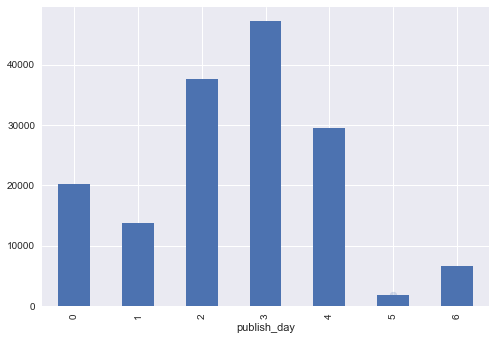

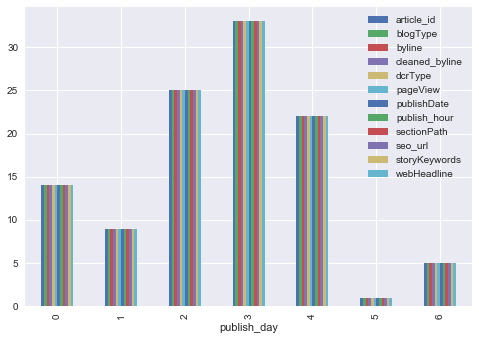

In [279]:
low_hits=original_data[(original_data.pageView < 2000) & (original_data.pageView > 1000)]
# pivot=pd.pivot_table(low_hits, index=['sectionPath', "publish_day"], values="pageView", aggfunc=np.sum)
low_hits_features=low_hits[(low_hits['sectionPath'] != None)  & (low_hits['sectionPath'].str.contains("features") )]
plt.scatter(x=low_hits_features['publish_day'], y=low_hits_features['pageView'], alpha=0.2)
features_hits_pivot=pd.pivot_table(low_hits_features, index=[ "publish_day"], values="pageView", aggfunc=np.sum)
features_hits_pivot.plot(kind="bar")
# low_hits_features.groupby("publish_day").pageView.agg('sum')
# low_hits_features.head()

low_hits_features_pivot=pd.pivot_table(low_hits_features, index="publish_day", aggfunc=np.size)
low_hits_features_pivot.plot(kind="bar")

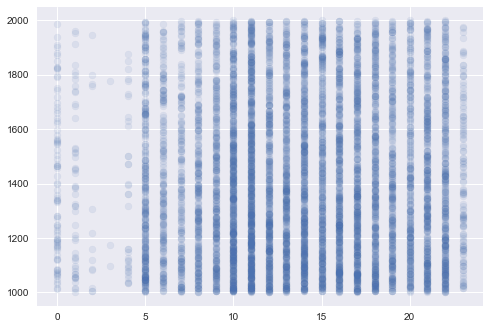

In [281]:
g = plt.scatter(x=low_hits['publish_hour'], y=low_hits['pageView'], alpha=0.1)

TypeError: lmplot() missing 2 required positional arguments: 'x' and 'y'

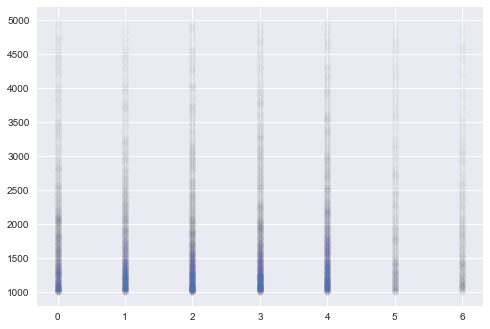

In [179]:
g = plt.scatter(x=low_hits['publish_day'], y=low_hits['pageView'], alpha=0.005) 
sns.lmplot( data=low_hits, col="publish_day", row="pageView")